In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
results_path = '../metrics/results/'

In [3]:
csv_paths = ['../metrics/results/cartolastd_lambdatest.csv',
             '../metrics/results/cifar10cnn_lambdatest.csv',
             '../metrics/results/esc50_lambdatest.csv',
             '../metrics/results/fashion_lambdatest.csv',
             '../metrics/results/gaussians_lambdatest.csv',
             '../metrics/results/nnset_lambdatest.csv',
             '../metrics/results/qtables_lambdatest.csv',
             '../metrics/results/quickdraw_lambdatest.csv',
             '../metrics/results/sorts_lambdatest.csv',
             '../metrics/results/walk_lambdatest.csv'
            ]

In [4]:
def get_method(name):
    s = name
#     s = s.split('/')[1]
    s = s.split('-', 1)[1]

    if s.startswith('tsne_s1'):
        return 'TF-tSNE'
    elif s.startswith('tsne_s4'):
        return 'G-tSNE'
    elif s.startswith('ctsne'):
        return 'C-tSNE'
    elif s.startswith('dtsne'):
        return 'D-tSNE'
    elif s.startswith('ldtsne'):
        return 'LD-tSNE'
    elif s.startswith('pcadtsne'):
        return 'PCD-tSNE'
    elif s.startswith('pca_s1'):
        return 'TF-PCA'        
    elif s.startswith('pca_s4'):
        return 'G-PCA'
    elif s.startswith('umap_s1'):
        return 'TF-UMAP'        
    elif s.startswith('umap_s4'):
        return 'G-UMAP'
    elif s.startswith('cumap'):
        return 'C-UMAP'
    else:
        return s.split('_')[0]

In [5]:
df_metrics = pd.DataFrame()
for p in csv_paths:
    df = pd.read_csv(p)
    df = df.drop(['spat_kl', 'stab_kl'], axis=1)  # Bad metric
    # Extract dataset and method into own column
    df.columns = np.concatenate([['name'], df.columns.values[1:]])
    df['dataset'] = df.name.str.split(r'[_-]').str[0]
    df['method'] = df['name'].apply(get_method)
    df = df.set_index('name')
    
    # Remove CAE and CVAE 
    df = df[df['method'] != 'C2AE']
    df = df[df['method'] != 'C2VAE']
    
    # Average nh and np metrics 
    nh_cols = [c for c in df.columns if 'spat_nh_' in c]
    df['spat_nh_mean'] = np.mean(df[nh_cols], axis=1)

    np_cols = [c for c in df.columns if 'spat_np_' in c]
    df['spat_np_mean'] = np.mean(df[np_cols], axis=1)
    
    np_cols = [c for c in df.columns if 'spat_trust_' in c]
    df['spat_trust_mean'] = np.mean(df[np_cols], axis=1)
    
    np_cols = [c for c in df.columns if 'spat_cont_' in c]
    df['spat_cont_mean'] = np.mean(df[np_cols], axis=1)
    
    df_metrics = pd.concat([df_metrics, df])

In [6]:
datasets = df_metrics['dataset'].factorize()[1]
for dataset in datasets:
    methods = df_metrics[df_metrics['dataset'] == dataset]['method']
    
    df = df_metrics[df_metrics['dataset'] == dataset]
    df = df[['stab_pearson', 'stab_spearman' , 'stab_kendall', 'stab_stress_s']]
    stab_df = (df - df.min())/(df.max() - df.min())
    stab_df['stab_stress_s'] = 1 - stab_df['stab_stress_s']
#     display(stab_df)

    df = df_metrics[df_metrics['dataset'] == dataset]
    df = df[['spat_pearson', 'spat_spearman' , 'spat_kendall', 'spat_stress_s']]
    spat_df = (df - df.min())/(df.max() - df.min())
    spat_df['spat_stress_s'] = 1 - spat_df['spat_stress_s']
#     display(spat_df)

    df = df_metrics[df_metrics['dataset'] == dataset]
    df = df[['spat_nh_mean', 'spat_np_mean', 'spat_trust_mean', 'spat_cont_mean']]
    neigh_df = (df - df.min())/(df.max() - df.min())
#     display(neigh_df)
#     display((stab_df.mean(axis=1) + spat_df.mean(axis=1) + neigh_df.mean(axis=1)).sort_values(ascending=False))

In [7]:
df

,spat_nh_mean,spat_np_mean,spat_trust_mean,spat_cont_mean
name,,,,
walk-pca_s4.csv,0.891536,0.425300,0.924954,0.878163
walk-pcadtsne-p30-l0_010000-le1-ls1_00.csv,0.888978,0.434116,0.929102,0.881077
walk-pcadtsne-p30-l0_001000-le1-ls1_00.csv,0.892671,0.463206,0.937800,0.891152
walk-pcadtsne-p30-l0_000100-le1-ls1_00.csv,0.905194,0.479669,0.939054,0.894122
walk-pcadtsne-p30-l0_000010-le1-ls1_00.csv,0.896875,0.481265,0.927603,0.891449
walk-pcadtsne-p30-l0_000001-le1-ls1_00.csv,0.925762,0.472410,0.902061,0.879931
walk-pcadtsne-p30-l0_000000-le1-ls1_00.csv,0.919165,0.466820,0.897961,0.873774
walk-cumap.csv,0.817078,0.428724,0.914264,0.866466


In [8]:
colors = {
    'AE' : '#71B7DA',
    'VAE' : '#4292C6',
    
    'TF-tSNE' : '#D94801',
    'G-tSNE' : '#F16913',
    'C-tSNE' : '#A63603',
    'D-tSNE' : '#804000',

    'TF-UMAP' : '#807DBA',
    'G-UMAP' : '#BDBDDC',
    'C-UMAP' : '#CBC9DA',
    
    'TF-PCA' : '#9DD986',
    'G-PCA' : '#659C40',
    
    'LD-tSNE' : '#C000C0',
    'PCD-tSNE' : '#FBA3FF'    
}

Green = Distance preservation
Purple = Neighborhood preservation
Orange = Stability

In [9]:
metrics = ['spat_pearson', 'spat_spearman' , 'spat_kendall', 'spat_stress_s', 'v_spacer_1', 'spat_nh_mean', 'spat_np_mean', 'spat_trust_mean', 'spat_cont_mean', 'v_spacer_2', 'stab_pearson', 'stab_spearman' , 'stab_kendall', 'stab_stress_s']
metric_tex = [r'$S_{Pearson}$', r'$S_{Spearman}$', r'$S_{Kendall}$', r'$S_{Stress}$', '', 
              r'$S_{NH}$', r'$S_{NP}$', r'$S_{Trust}$', r'$S_{Cont}$', '', 
              r'$T_{Pearson}$', r'$T_{Spearman}$', r'$T_{Kendall}$', r'$T_{Stress}$',]


invert_colormap = ['stab_stress_n', 'stab_stress_s', 'spat_stress_n', 'spat_stress_s']

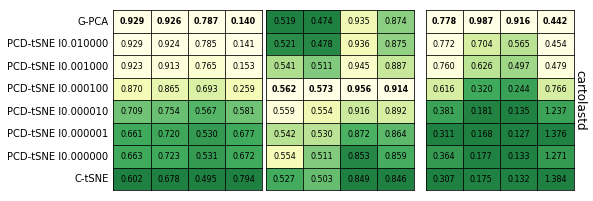

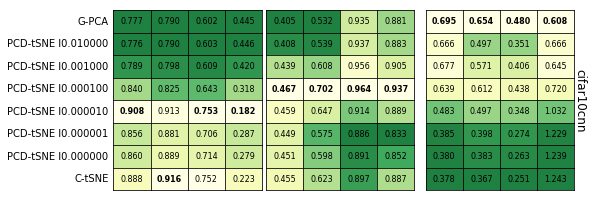

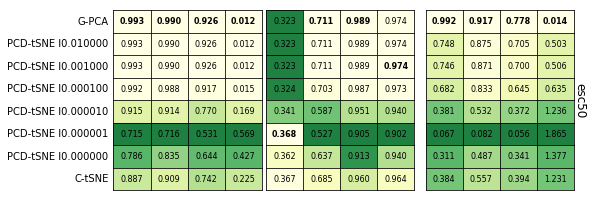

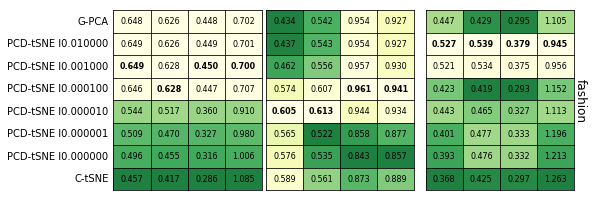

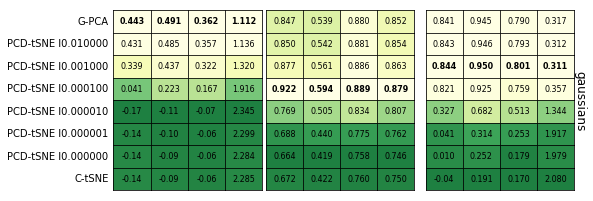

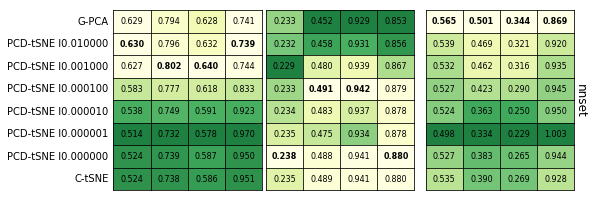

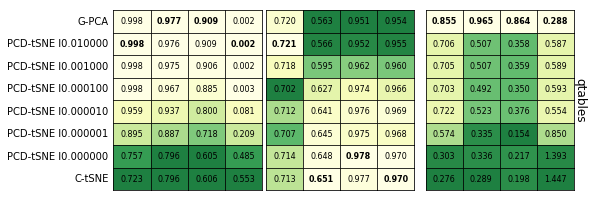

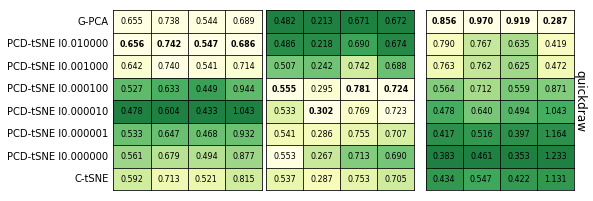

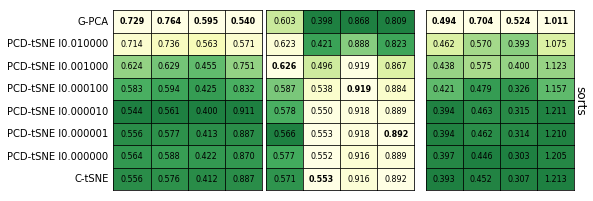

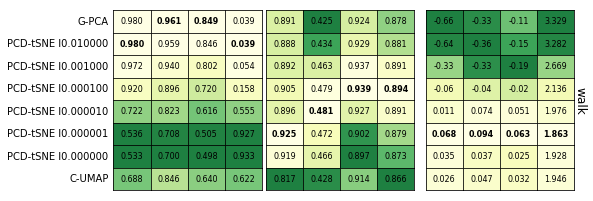

In [10]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

def make_cell(df, index, metric, ax):
    
    avg = df[metric][index]

    colormap_max = max(df[metric])
    colormap_min = min(df[metric])
    metric_max = max(df[metric])
    metric_min = min(df[metric])

    interval = abs(colormap_max - colormap_min)
    if metric in invert_colormap:
        cmap = plt.cm.get_cmap('YlGn')        
        norm = matplotlib.colors.Normalize(vmin=colormap_min, 
                                           vmax=colormap_max + 0.3 * interval)        
    else:
        cmap = plt.cm.get_cmap('YlGn_r')
        norm = matplotlib.colors.Normalize(vmin=colormap_min - 0.3 * interval, 
                                           vmax=colormap_max)

    cell_color = cmap(norm(avg))
    ax.set_facecolor(cell_color)
    
    text = str(avg)[:5]
    if (avg == max(df[metric]) and metric not in invert_colormap) or (avg == min(df[metric]) and metric in invert_colormap):
        ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=8, transform=ax.transAxes, fontweight='bold') # Need to be sure of the center
    else:
        ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=8, transform=ax.transAxes) # Need to be sure of the center
    plt.subplots_adjust(left=0.1, right=0.9, top=1.0, bottom=0.0)    
    ax.set_yticks([])
    ax.set_xticks([])
    

for dataset_index, dataset in enumerate(df_metrics['dataset'].factorize()[1]):
    df = df_metrics[df_metrics['dataset'] == dataset]
    heights = [1] * len(df)
    widths = [1.0] * 4 + [0.1] + [1.0] * 4 + [0.3] + [1.0] * 4
#     heights = [1.0] * 2 + [0.1] + [1.0] * 3 + [0.1] + [1.0] * 2 + [0.1] + [1.0] * 2 + [0.1] + [1.0] * 1
    fig, axs = plt.subplots( len(df), 14, sharex='col', sharey='row', figsize=(8,2.5),
                            gridspec_kw={'hspace': 0, 'wspace': 0, 
                                         'width_ratios':widths, 'height_ratios':heights})
    
    fig.suptitle(dataset, x=.91, y=.5, ha='center', va='center', rotation=270, fontsize=12)

    for col_index, metric in enumerate(metrics):        
        if metric.startswith('v_spacer'):
            for row_index in range(len(df)):
                ax = axs[row_index, col_index]
                ax.set_visible(False)
        else: 
            for row_index, index in enumerate(df.index):                
                ax = axs[row_index, col_index]

                if col_index == 0:
#                     ax.set_ylabel(index[7:], rotation=0, ha='right', va='center', labelpad=5, fontsize=14)
                    if df['method'][index] == 'PCD-tSNE': 
                        method_name = df['method'][index] + ' ' + index.split('-')[3].replace('_', '.')
                    else: 
                        method_name = df['method'][index]
                    ax.set_ylabel(method_name, rotation=0, ha='right', va='center', labelpad=5, fontsize=10)
#                 if row_index == 0 and (dataset_index == 0) :
#                     matplotlib.rcParams['text.usetex'] = True
#                     ax.set_title(metric_tex[col_index], rotation=30, ha='center', va='bottom', fontsize=12, family='serif')
#                     matplotlib.rcParams['text.usetex'] = False

                make_cell(df, index, metric, ax)
    
#     fig.savefig('table_' + dataset + '.eps', pad_inches=0, bbox_inches='tight')
#     break

In [11]:
# 1 pure pca
# 0 pure tsne

In [12]:
# metrics = ['spat_pearson', 'spat_spearman' , 'spat_kendall', 'spat_stress_s', 'spat_nh_mean', 'spat_np_mean', 'spat_trust_mean', 'spat_cont_mean', 'stab_pearson', 'stab_spearman' , 'stab_kendall', 'stab_stress_s']
# for dataset_index, dataset in enumerate(df_metrics['dataset'].factorize()[1]):
#     df = df_metrics[df_metrics['dataset'] == dataset][metrics]
#     df.to_csv('lambda_{}.csv'.format(dataset))
    

In [13]:
## Trying to select best run

In [14]:
def make_cell(df, index, metric, ax):
    
    avg = df[metric][index]

    colormap_max = max(df[metric])
    colormap_min = min(df[metric])
    metric_max = max(df[metric])
    metric_min = min(df[metric])

    interval = abs(colormap_max - colormap_min)
    if metric in invert_colormap:
        cmap = plt.cm.get_cmap('YlGn')        
        norm = matplotlib.colors.Normalize(vmin=colormap_min, 
                                           vmax=colormap_max + 0.3 * interval)        
    else:
        cmap = plt.cm.get_cmap('YlGn_r')
        norm = matplotlib.colors.Normalize(vmin=colormap_min - 0.3 * interval, 
                                           vmax=colormap_max)

    cell_color = cmap(norm(avg))
    ax.set_facecolor(cell_color)
    
    text = str(avg)[:5]
    if (avg == max(df[metric]) and metric not in invert_colormap) or (avg == min(df[metric]) and metric in invert_colormap):
        ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=8, transform=ax.transAxes, fontweight='bold') # Need to be sure of the center
    else:
        ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=8, transform=ax.transAxes) # Need to be sure of the center
    plt.subplots_adjust(left=0.1, right=0.9, top=1.0, bottom=0.0)    
    ax.set_yticks([])
    ax.set_xticks([])

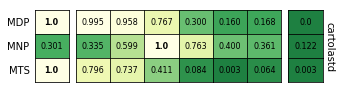

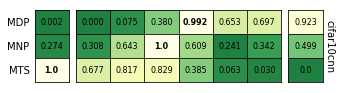

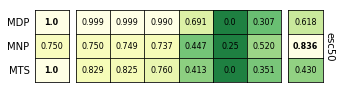

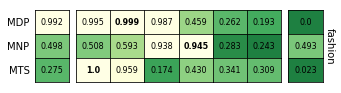

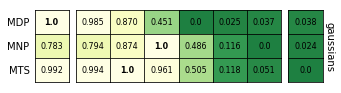

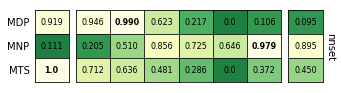

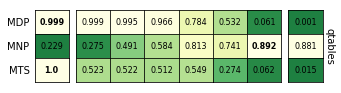

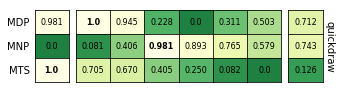

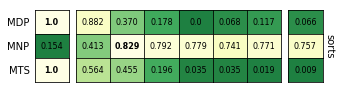

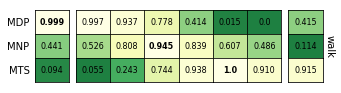

In [44]:
stab_mean = pd.DataFrame()
spat_mean = pd.DataFrame()
neigh_mean = pd.DataFrame()

datasets = df_metrics['dataset'].factorize()[1]
for dataset in datasets:
    methods = df_metrics[df_metrics['dataset'] == dataset].index
    methods = methods.insert(1, 'v_spacer')
    methods = methods.insert(-1, 'v_spacer')
    methods
    
    df = df_metrics[df_metrics['dataset'] == dataset]
    df = df[['stab_pearson', 'stab_spearman' , 'stab_kendall', 'stab_stress_s']]
    stab_df = (df - df.min())/(df.max() - df.min())
    stab_df['stab_stress_s'] = 1 - stab_df['stab_stress_s']
    df = stab_df.mean(axis=1)
    stab_mean = df.to_frame()

    df = df_metrics[df_metrics['dataset'] == dataset]
    df = df[['spat_pearson', 'spat_spearman' , 'spat_kendall', 'spat_stress_s']]
    spat_df = (df - df.min())/(df.max() - df.min())
    spat_df['spat_stress_s'] = 1 - spat_df['spat_stress_s']
    df = spat_df.mean(axis=1)
    spat_mean = df.to_frame()

    df = df_metrics[df_metrics['dataset'] == dataset]
    df = df[['spat_nh_mean', 'spat_np_mean', 'spat_trust_mean', 'spat_cont_mean']]
    neigh_df = (df - df.min())/(df.max() - df.min())
    df = neigh_df.mean(axis=1)
    neigh_mean = df.to_frame()
    
    fig, axs = plt.subplots(3, len(neigh_mean) + 2, sharex='col', sharey='row', figsize=(5,1),
                            gridspec_kw={'hspace': 0, 'wspace': 0, 'width_ratios':[1,.2,1,1,1,1,1,1,.2,1]})
    
    fig.suptitle(dataset, x=.92, y=.5, ha='center', va='center', rotation=270, fontsize=10)

    axs[0][0].set_ylabel('MDP', rotation=0, ha='right', va='center', labelpad=5, fontsize=10)
    axs[1][0].set_ylabel('MNP', rotation=0, ha='right', va='center', labelpad=5, fontsize=10)
    axs[2][0].set_ylabel('MTS', rotation=0, ha='right', va='center', labelpad=5, fontsize=10)
    
    for row_index, index in enumerate(methods):
        if index.startswith('v_spacer'):
            axs[0, row_index].set_visible(False)
            axs[1, row_index].set_visible(False)
            axs[2, row_index].set_visible(False)            
        else:
            ax = axs[0, row_index]
            make_cell(spat_mean, index, 0, ax)
            ax = axs[1, row_index]
            make_cell(neigh_mean, index, 0, ax)
            ax = axs[2, row_index]
            make_cell(stab_mean, index, 0, ax)
#     break
    fig.savefig('./lambda-raw/lambda_' + dataset + '.png', dpi=400, pad_inches=0)

# display(stab_mean)
# display(spat_mean)
# display(neigh_mean)
# spat_mean.columns = datasets
# neigh_mean.columns = datasets
# stab_mean.columns = datasets